In [1]:
#Topic Modelling for a corpus of PubMed Papers
#2239 Documents converted into a .csv corpus
#Preprocessing the text
#Coherence Score Calculated
#Topic-Document matrix output

In [2]:
import functions

In [3]:
functions.outputs.make_csv("/Users/manojarachige/Documents/Coding/BMedScDOC1/Assets/separated_pdfs", "txt")

In [4]:
#csv called corpus.csv saved to current working directory

In [5]:
import pandas as pd
import csv

df=pd.read_csv('corpus.csv', encoding = 'unicode_escape', encoding_errors = 'ignore', engine ='c')
df.head()

,name,text
0,10025429.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
1,10051932.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
2,10084544.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
3,10100568.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
4,10187866.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...


In [6]:
df['processed_text'] = df['text'].apply(functions.processing.preprocess)
df.head()

,name,text,processed_text
0,10025429.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"[monitoring, venous, hemodynamic, patient, cer..."
1,10051932.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"[binderpagetif, report, investigation, epidura..."
2,10084544.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"[short, reporteeg, finding, dementia, lewy, bo..."
3,10100568.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"[bmtpbone, marrow, transplantation, stockton, ..."
4,10187866.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"[stroke, unit, natural, habitatstroke, unit, n..."


In [8]:
df["word_count"] = df["processed_text"].apply(lambda x: len(x))
df.head()

,name,text,processed_text,word_count
0,10025429.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"[monitoring, venous, hemodynamic, patient, cer...",2123
1,10051932.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"[binderpagetif, report, investigation, epidura...",1970
2,10084544.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"[short, reporteeg, finding, dementia, lewy, bo...",1390
3,10100568.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"[bmtpbone, marrow, transplantation, stockton, ...",927
4,10187866.txt,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"[stroke, unit, natural, habitatstroke, unit, n...",2457


In [9]:
# Descriptive statistics for word count
df['word_count'].describe()

count     2239.000000
mean      2566.454667
std       1937.203281
min          0.000000
25%       1201.500000
50%       2164.000000
75%       3426.000000
max      25943.000000
Name: word_count, dtype: float64

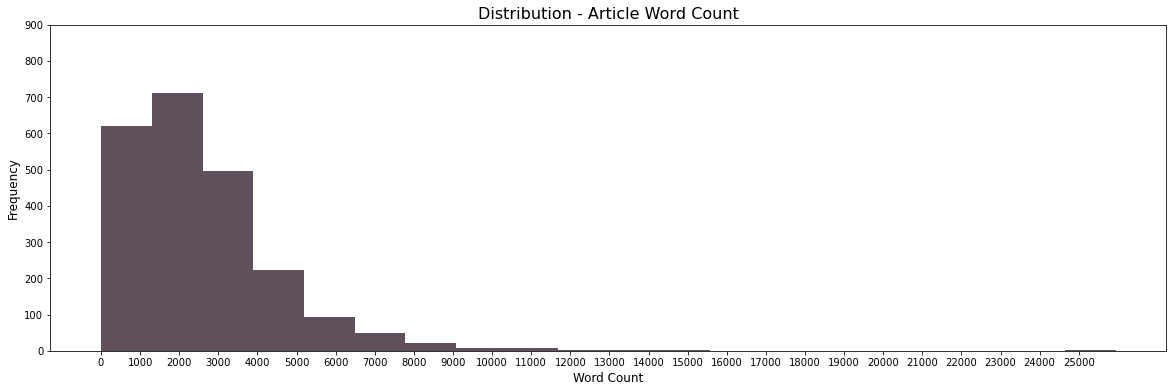

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Plot a hist of the word counts
fig = plt.figure(figsize=(20,6))

plt.hist(
    df['word_count'],
    bins=20,
    color='#60505C'
)

plt.title('Distribution - Article Word Count', fontsize=16)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Word Count', fontsize=12)
plt.yticks(np.arange(0, 1000, 100))
plt.xticks(np.arange(0, 26000, 1000))

file_name = 'hist'

plt.show()

In [27]:
from collections import Counter

# Get the top 20 most common words among all the articles
p_text = df['processed_text']

# Flaten the list of lists
p_text = [item for sublist in p_text for item in sublist]

# Top 20
top_20 = pd.DataFrame(
    Counter(p_text).most_common(50),
    columns=['word', 'frequency']
)

top_20

,word,frequency
0,patient,75076
1,al,36052
2,et,35642
3,study,34239
4,use,28179
5,j,25441
6,p,23873
7,brain,23400
8,m,20137
9,consciousness,18747
